In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [3]:
hr=pd.read_csv('Hr_Analytics.csv')

In [4]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
hr.shape

(1470, 35)

In [271]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [272]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
#To check duplicate value
hr.duplicated().sum()

0

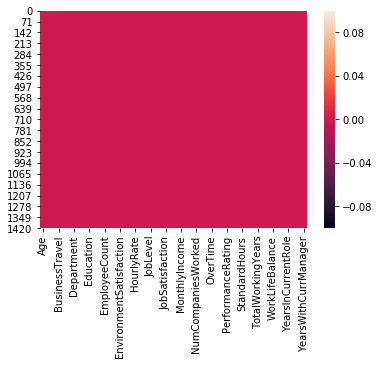

In [7]:
#To check missing value
sns.heatmap(hr.isnull())

In [275]:
hr.isnull().sum().sum()

0

Summary Statistics

In [8]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
hr=hr.drop(["EmployeeCount","StandardHours"],axis=1)

Check Correlation

In [10]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


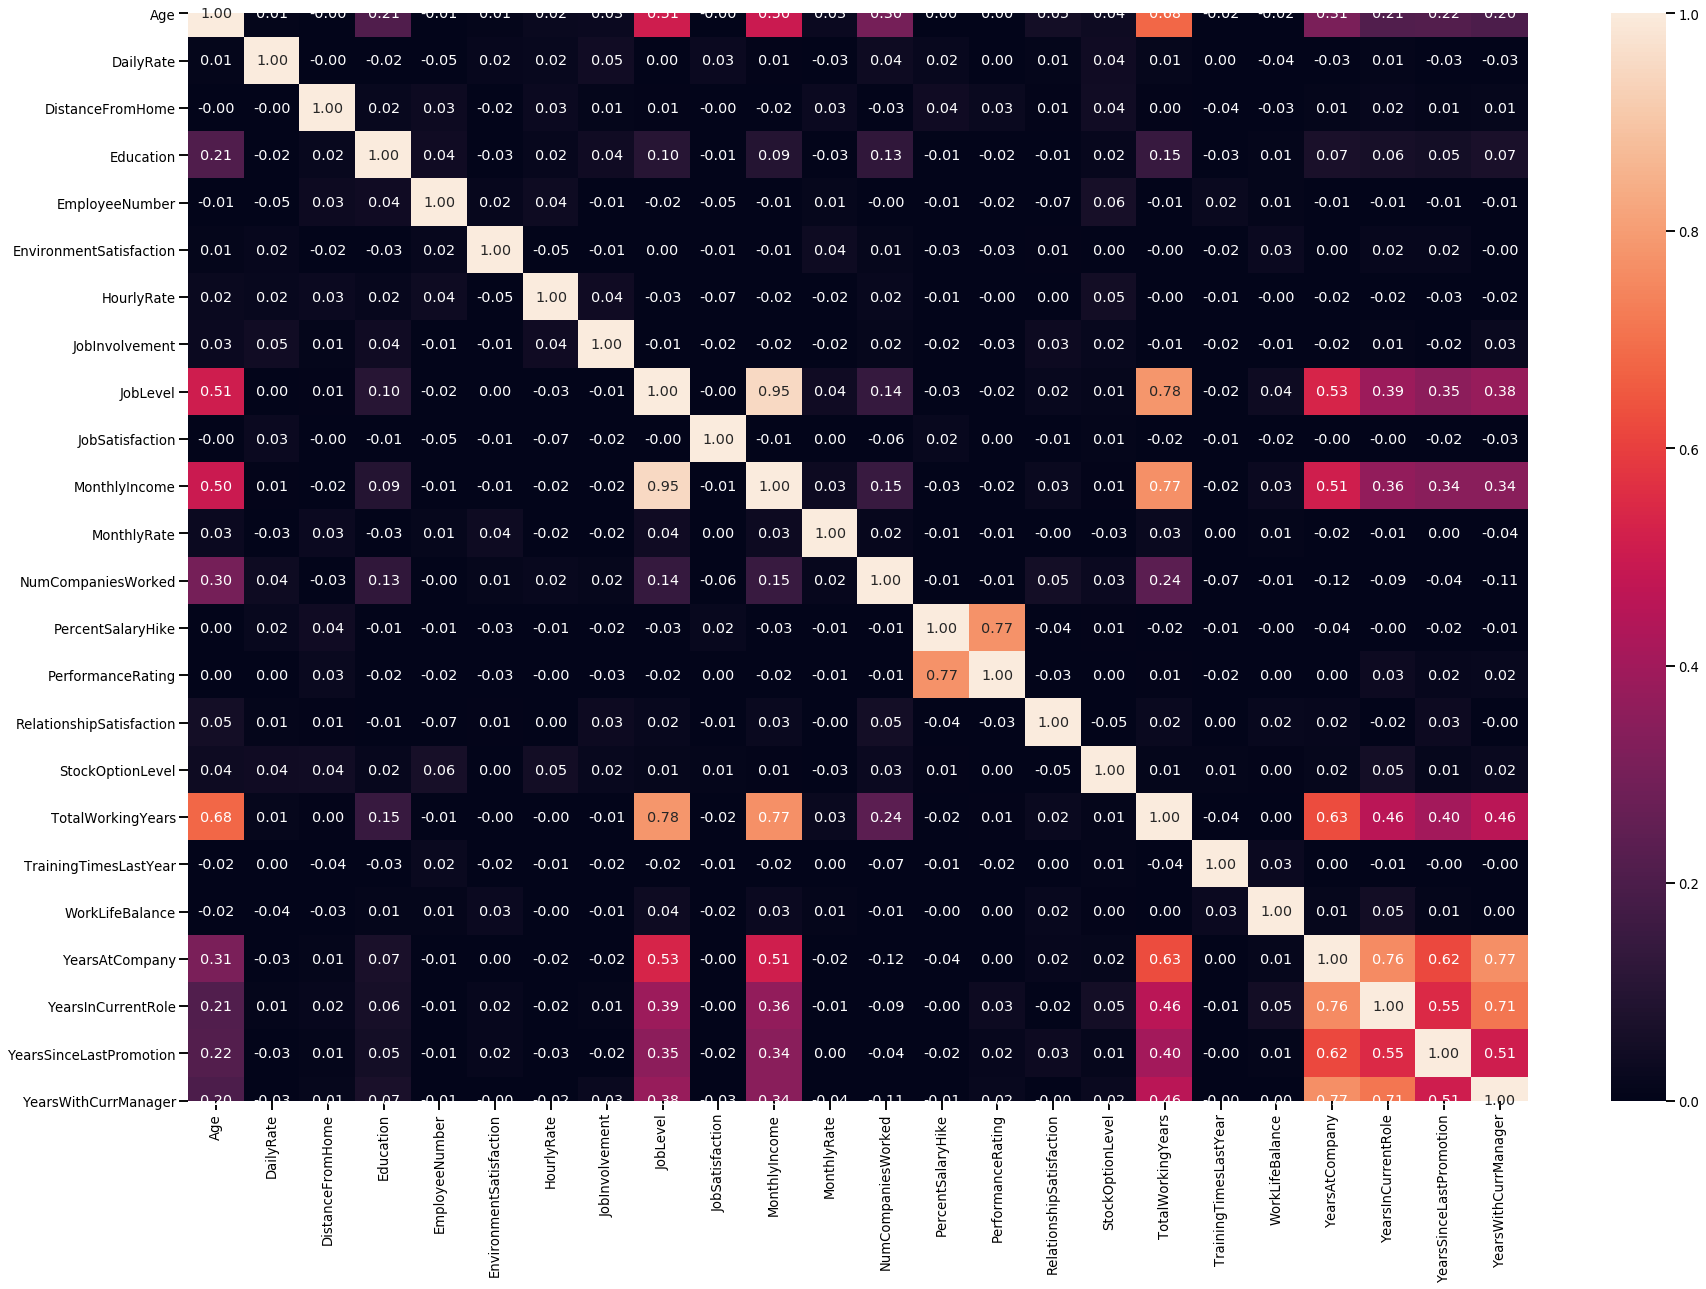

In [11]:
#showing the corelation with a heatmap
plt.figure(figsize=(30,20))
sns.set #(style='darkgrid')
sns.set_context('talk',font_scale=0.8)
sns.heatmap(hr.corr(),annot=True,fmt='.2f',vmax=1,vmin=0)
plt.show()

In [12]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate           

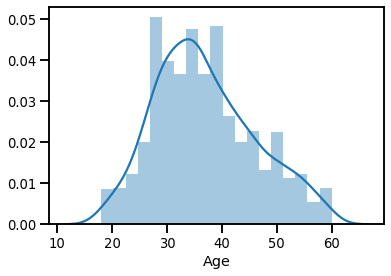

In [13]:
#Age
sns.distplot(hr['Age'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000DCA226EC48>,
      dtype=object)

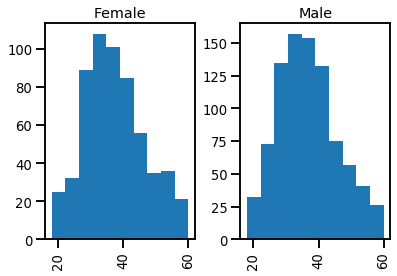

In [282]:
#Age and Gender
hr.hist(column='Age',by='Gender')

In [283]:
#Attrition
hr.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
hr.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
attrition={'No':0,'Yes':1} 
hr.Attrition=[attrition[item] for item in hr.Attrition] 

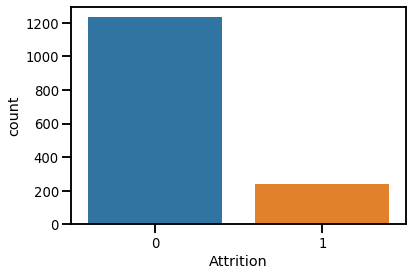

In [16]:
sns.countplot(x='Attrition',data=hr)

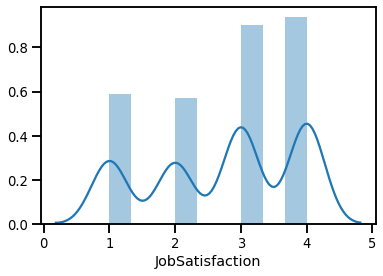

In [287]:
#JobSatisfaction
sns.distplot(hr['JobSatisfaction'])

In [17]:
#BusinessTravel
hr.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [18]:
hr.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [19]:
business_travel={'Travel_Rarely':0,'Travel_Frequently':1,'Non-Travel':2} 
hr.BusinessTravel=[business_travel[item] for item in hr.BusinessTravel] 

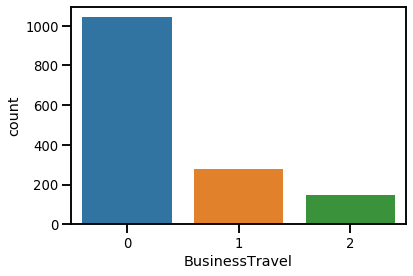

In [20]:
sns.countplot(x="BusinessTravel",data=hr)

In [21]:
#Department
hr.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [22]:
hr.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [23]:
department={'Research & Development':0,'Sales':1,'Human Resources':2} 
hr.Department =[department[item] for item in hr.Department] 

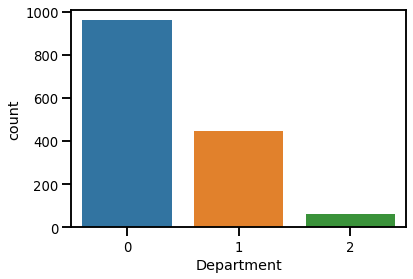

In [24]:
sns.countplot(x="Department",data=hr)

In [25]:
#EducationField
hr.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [26]:
hr.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [27]:
education_field = {'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Other':4,'Human Resources':5} 
hr.EducationField = [education_field[item] for item in hr.EducationField] 

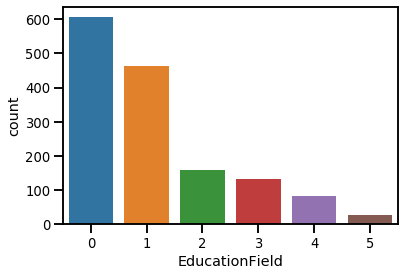

In [28]:
sns.countplot(x="EducationField",data=hr)

In [29]:
#Gender
hr.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [30]:
hr.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [31]:
gender = {'Male': 0,'Female': 1} 
hr.Gender = [gender[item] for item in hr.Gender] 

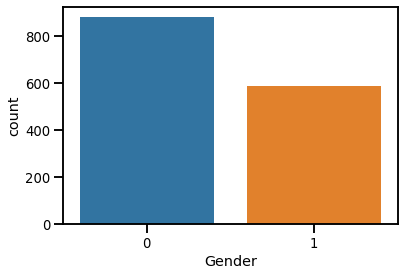

In [32]:
sns.countplot(x="Gender",data=hr)

In [33]:
#JobRole
hr.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [34]:
hr.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [35]:
job_role= {'Sales Executive': 0,'Research Scientist': 1,'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8} 
hr.JobRole= [job_role[item] for item in hr.JobRole] 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

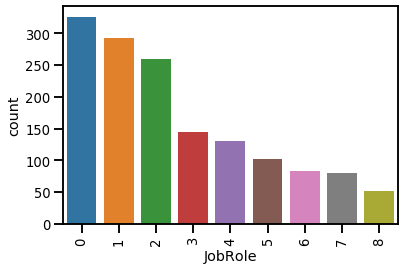

In [36]:
sns.countplot(x="JobRole",data=hr)
plt.xticks(rotation=90)

In [37]:
#MaritalStatus 
hr.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [38]:
hr.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [39]:
marital_status = {'Married':0,'Single':1,'Divorced':2} 
hr.MaritalStatus= [marital_status[item] for item in hr.MaritalStatus] 

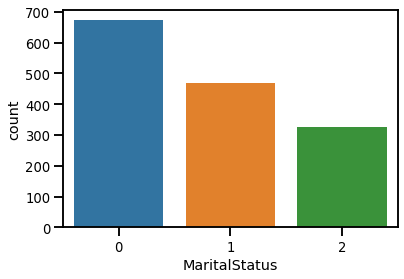

In [40]:
sns.countplot(x="MaritalStatus",data=hr)

In [41]:
#Over18 ,
hr.Over18.unique()

array(['Y'], dtype=object)

In [42]:
over_18 = {'Y':1} 
hr.Over18= [over_18[item] for item in hr.Over18] 

In [43]:
#OverTime
hr.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [44]:
hr.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [45]:
over_time= {'Yes':1,'No':0} 
hr.OverTime= [over_time[item] for item in hr.OverTime] 

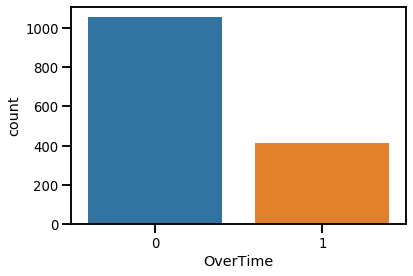

In [46]:
sns.countplot(x="OverTime",data=hr)

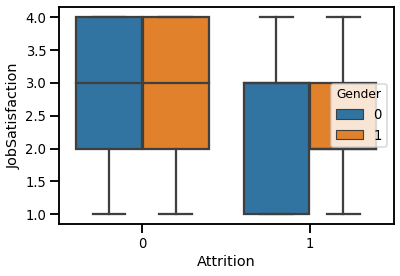

In [47]:
#Job satisfaction by Gender
sns.boxplot(x='Attrition',y='JobSatisfaction',hue='Gender',data=hr)

Plotting Outliers

In [48]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 33 Text xticklabel objects>)

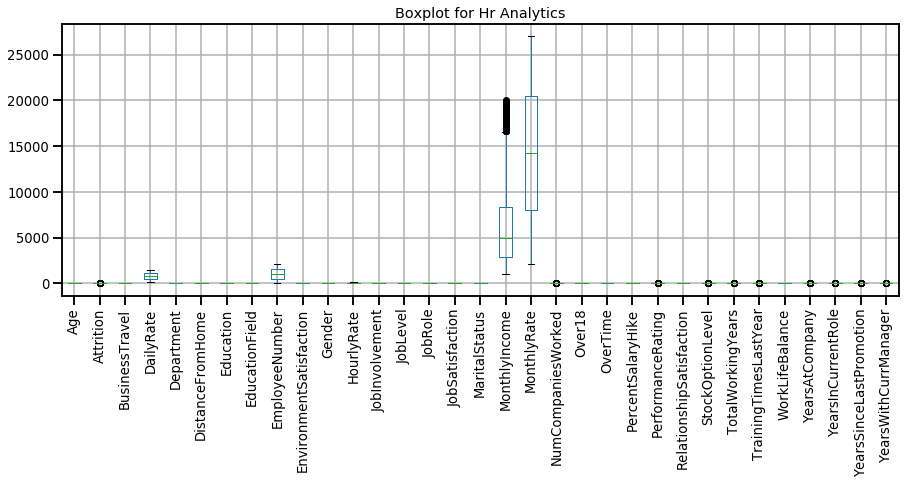

In [49]:
hr.plot(kind='box',grid=True,title="Boxplot for Hr Analytics",legend=True,rot=30,figsize=(15,5))
plt.xticks(rotation=90)

In [50]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(hr))
sbi=hr.loc[(z_score < 3).all(axis=1)]

In [51]:
#check skewsness
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              1.439006
DailyRate                  -0.003519
Department                  1.141828
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              1.174710
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                      0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.443615
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

In [52]:
for col in sbi.columns:
    if sbi.skew().loc[col] > 0.55:
        sbi[col]=np.log1p(sbi[col])

In [53]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              1.439006
DailyRate                  -0.003519
Department                  1.141828
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              1.174710
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                      0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                     0.770149
JobSatisfaction            -0.329672
MaritalStatus               0.443615
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
T

Label Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder
labelquality = LabelEncoder()

In [55]:
hr['Attrition'] = labelquality.fit_transform(hr['Attrition'])

Features and Target Value

In [56]:
x=hr.drop('Attrition',axis=1)
y=hr['Attrition']

In [57]:
x.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1102,1,1,2,0,1,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,0,8,1,0,2,3,0,...,4,4,1,10,3,3,10,7,1,7


In [58]:
y.head(2)

0    1
1    0
Name: Attrition, dtype: int64

Standardisation 

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [60]:
x=sc.fit_transform(x)
x

array([[ 0.4463504 , -0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521,  0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  , -0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

Spilt Train and Test

In [62]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        fpr,tpr,thresholds=roc_curve(y_test,pred)
        roc_auc=auc(fpr,tpr)

        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print("fpr: ",fpr)
    print("tpr: ",tpr)
    print("thresholds: ",thresholds)
    print("roc_auc: ",roc_auc)
    print()
    print('prediction: ',pred)
     

    plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
    plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
    plt.legend(loc='best',fontsize='medium',shadow=True)
    plt.xlabel("FPR")
    plt.ylabel('TPR')
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
    plt.show()
    
    return random_state    

Logistic Regression

random_state for mod  is  123 which gives accuracy score of:  0.9160997732426304
f1_score:  0.48214285714285715
confusion matrix:  [[356  12]
 [ 46  27]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.97      0.92       368
           1       0.69      0.37      0.48        73

    accuracy                           0.87       441
   macro avg       0.79      0.67      0.70       441
weighted avg       0.85      0.87      0.85       441

fpr:  [0.        0.0326087 1.       ]
tpr:  [0.         0.36986301 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6686271590232281

prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0

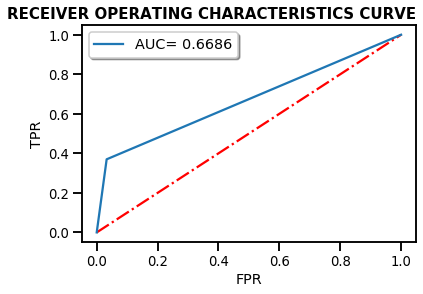

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

In [64]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.8721240180633527

KNN

In [368]:
kn=KNeighborsClassifier()
kn_param={'n_neighbors':range(1,10),'leaf_size':range(20,70)}
kn_g=GridSearchCV(kn,kn_param,cv=15)
kn_g.fit(x,y)
kn_g.best_params_

{'leaf_size': 20, 'n_neighbors': 9}

random_state for mod  is  130 which gives accuracy score of:  0.891156462585034
f1_score:  0.12345679012345677
confusion matrix:  [[365   3]
 [ 68   5]]
classification report:                precision    recall  f1-score   support

           0       0.84      0.99      0.91       368
           1       0.62      0.07      0.12        73

    accuracy                           0.84       441
   macro avg       0.73      0.53      0.52       441
weighted avg       0.81      0.84      0.78       441

fpr:  [0.         0.00815217 1.        ]
tpr:  [0.         0.06849315 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.530170488385944

prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

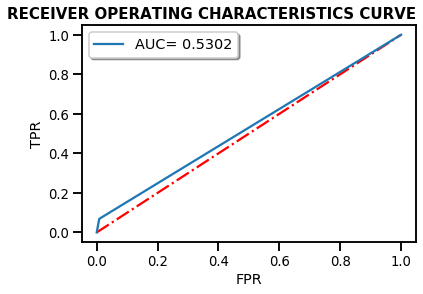

In [65]:
kn=KNeighborsClassifier(n_neighbors=9)
knn=rst(kn,x,y)

In [66]:
#Cross Validation
accuracy_score_2=cross_val_score(kn,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_2

0.8455785461167066

DecisionTree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 5}

random_state for mod  is  136 which gives accuracy score of:  0.8798185941043084
f1_score:  0.4461538461538461
confusion matrix:  [[340  28]
 [ 44  29]]
classification report:                precision    recall  f1-score   support

           0       0.89      0.92      0.90       368
           1       0.51      0.40      0.45        73

    accuracy                           0.84       441
   macro avg       0.70      0.66      0.68       441
weighted avg       0.82      0.84      0.83       441

fpr:  [0.         0.07608696 1.        ]
tpr:  [0.         0.39726027 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6605866587254318

prediction:  [0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0

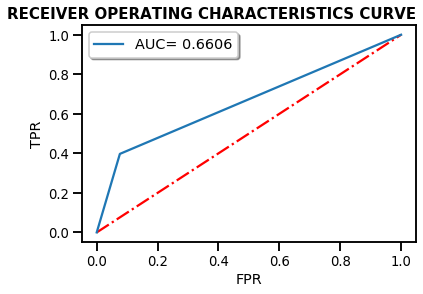

In [68]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc=rst(dt,x,y)

In [69]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_3

0.8387758250282712

GaussianNB

random_state for mod  is  32 which gives accuracy score of:  0.8458049886621315
f1_score:  0.5028571428571429
confusion matrix:  [[310  58]
 [ 29  44]]
classification report:                precision    recall  f1-score   support

           0       0.91      0.84      0.88       368
           1       0.43      0.60      0.50        73

    accuracy                           0.80       441
   macro avg       0.67      0.72      0.69       441
weighted avg       0.83      0.80      0.82       441

fpr:  [0.        0.1576087 1.       ]
tpr:  [0.         0.60273973 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.7225655151876116

prediction:  [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1

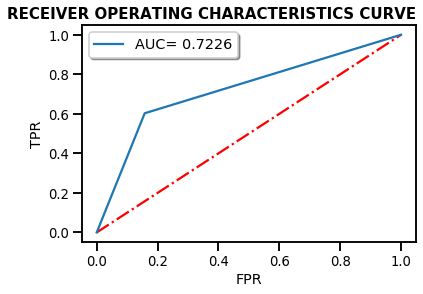

In [70]:
nb=GaussianNB()
gnb=rst(nb,x,y)

In [71]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_4

0.7917851035267864

SVC

In [361]:
sv=SVC()
sv_param={'kernel':('rbf','linear','poly'),'degree':range(3,8)}
sv_g=GridSearchCV(sv,sv_param,cv=15)
sv_g.fit(x,y)
sv_g.best_params_

{'degree': 3, 'kernel': 'linear'}

random_state for mod  is  113 which gives accuracy score of:  0.9115646258503401
f1_score:  0.42718446601941745
confusion matrix:  [[360   8]
 [ 51  22]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.98      0.92       368
           1       0.73      0.30      0.43        73

    accuracy                           0.87       441
   macro avg       0.80      0.64      0.68       441
weighted avg       0.85      0.87      0.84       441

fpr:  [0.         0.02173913 1.        ]
tpr:  [0.         0.30136986 1.        ]
thresholds:  [2 1 0]
roc_auc:  0.6398153662894579

prediction:  [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 

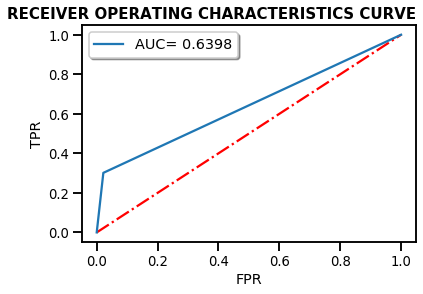

In [72]:
sv=SVC(kernel='linear',degree=3)
svc=rst(sv,x,y)

In [73]:
#Cross Validation
accuracy_score_5=cross_val_score(sv,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_5

0.8626090236168513

In [377]:
import joblib
joblib.dump(lr,"Logistic Regression_HR_Analytics.pkl")

['Logistic Regression_HR_Analytics.pkl']